In [ ]:
#Import plaidml library to use the AMD GPU for training
import plaidml.keras
plaidml.keras.install_backend()


#The keras framework is used with a tesnorflow library
from keras import backend as k
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical

from keras.models import load_model

#load handwritten digits from MNIST database
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#copy dataset before processing
x_show_test = x_test
y_show_test = y_test

x_show_train = x_train
y_show_train = y_train


In [ ]:
#showing the first example from the training set
plt.imshow(x_train[3], cmap="Greys")
x_train[0].shape

#convert format from 0-255 to 0-1
x_train, x_test = x_train/255.0, x_test/255.00

In [3]:

#reshape both datasets into (60000 pieces), (28,28 dimensions), (1, greyscale) 
x_train, x_test = x_train.reshape(60000,28,28,1), x_test.reshape(10000,28,28,1)

#convert labels to hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:

#create model
model = Sequential()


#4 convoluted layers with 3 Maxpooling layers
model.add(Conv2D(512, kernel_size=(3,3), activation = "relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Conv2D(128, kernel_size=(3,3), activation = "relu"))

#flatten and add a regular NN
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))


model.summary()

In [ ]:

#training and compile

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#keep track of performance
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)


#plot data
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
model.save("mymodel.h5")
del model



In [5]:
model = load_model("mymodel.h5")
  

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


In [6]:



result = model.predict(x_test)

for i in range(0, len(x_show_test)):
    result[i] = np.argmax(result[i])
    

listing = []
counter = 0
for j in range(0, len(x_show_test)):
    if result[j][0] != y_show_test[j]:
        print(j)
        listing.append(j)
        counter += 1    
    else:
        continue
        
print("COUNTER: " + str(counter))

8
18
107
195
247
340
354
391
420
445
449
511
542
543
551
582
625
667
674
684
691
761
947
956
965
1014
1114
1178
1181
1226
1232
1242
1247
1260
1299
1319
1325
1364
1403
1441
1500
1522
1530
1621
1737
1748
1769
1878
1885
1888
1901
1941
1955
2004
2035
2040
2043
2070
2093
2109
2118
2130
2135
2168
2182
2266
2293
2358
2414
2532
2597
2654
2720
2836
2896
2927
2939
2953
2995
3060
3062
3073
3129
3225
3289
3365
3422
3441
3448
3520
3557
3558
3762
3767
3781
3808
3853
3906
3941
3951
4013
4018
4053
4065
4126
4178
4185
4201
4207
4212
4248
4265
4360
4571
4620
4639
4674
4699
4731
4814
4823
4956
4990
5586
5655
5734
5749
5937
5955
5997
6400
6555
6569
6571
6576
6597
6625
6651
6755
6783
6883
7287
7413
7735
7745
7755
7871
8128
8138
8255
8272
8278
8287
8326
8339
8408
8522
8524
8527
9009
9015
9110
9540
9556
9594
9596
9599
9607
9669
9679
9698
9729
9792
COUNTER: 173


In [11]:
def show_mismatch(a):
    plt.imshow(x_show_test[a], cmap="Greys")
    print("\n" + "Echte Zahl: " + str(y_show_test[a]))
    print("Prediction: " + str(np.argmax(model.predict(np.reshape(x_test[a],(1,28,28,1))))))

Zahl zum prüfen:
3

Echte Zahl: 0
Prediction: 1


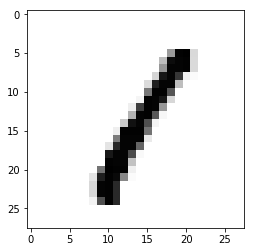

In [10]:
show_mismatch(int(input("Zahl zum prüfen:" + "\n")))